# WP10 Computergestützte Biologie I: Mathematische Modelle dynamischer Systeme (SoSe24)
## Woche 01

Teil der heutigen Übung ist:

    - Wiederholung von Grundlagen zu gewöhnlichen Differentialgleichungen (Aufgaben 1-3)
    - Numerische Lösung gewöhnlicher DGLn mit einer abhängigen Variablen (Aufgaben 4,7)
    - Analyse eines einfachen Neuronen-Modells: Leaky-Integrator (Aufgaben 4-6)


## Aufgabe 1
Betrachten Sie die folgenden Differentialgleichungen 
    
A)  ${dx \over dt} -5x = 0$

B)  ${dy \over dx} = -y + e^{-x}$

C)  ${d^2z \over dv^2} -z-3=0$

D)  ${dz \over dy} = 7z^2 y^3 $

und beantworten Sie die beiden Fragen:
    
    - Wieviele unabhängie Variablen haben gewöhnliche Differentialgleichungen im Allgemeinen?
    - Gibt es gewöhnliche Differentialgleichungen mit mehr als einer abhängigen Variablen?


Sowie für jede DGL die Fragen 1) - 6):

    1) Handelt es sich um gewöhnliche oder partielle Differentialgleichungen?
    2) Welche ist die abhängige und welche die unabhängige Variable?
    3) Welche Ordnung hat die DGL?
    4) Ist die DGL linear oder nicht-linear?
    5) Ist die DGL homogen?   
    6) Wieviele Randbedingungen benötigen wir, um eine eindeutige Lösung finden zu können?
    7) Ist das System autonom?
    
Tip: Legen sie evtl. eine kleine Tabelle an.

## Lösung 1

A) t unabh. Var., x abh. Var., 1. Ordnung, linear, homogen, 1 Randbed., autonom

B) x unabh. Var., y abh. Var., 1. Ordnung, linear, inhomogen, 1 Randbed., nicht-autonom

C) v unabh. Var., z abh. Var., 2. Ordnung, linear, inhomogen, 2 Randbed., autonom

D) y unabh. Var., z abh. Var., 1. Ordnung, nicht-linear, homogen, 1 Randbed., nicht-autonom

Gewöhnliche Differentialgleichungen haben immer eine unabhängige Variable. Differentialgleichungen mit mehreren unabhängigen Variablen bezeichnet man als partielle Differentialgleichungen (z.B. Diffusion, Wellen, Schrödinger,...)

Es gibt Systeme aus gewöhnlichen Differentialgleichungen mit mehreren abhängigen Variablen. Siehe Huxley-Hodgkin Woche 3. 

Eine kleine Bemerkung: Eine gewöhnliche Differentialgleichungen höherer Ordnung kann als ein System von gewöhnlichen Differentialgleichungen 1. Ordnung umformuliert werden.

## Aufgabe 2
Welche allgemeine Lösung passt zu welcher DGL? Ordnen Sie die folgenden Lösungen den Gleichungen aus Aufgabe 1 zu. x bezeichnet die abhängige und t die unabhängige Variable.

I)  $x(t) = c_1 e^{-t} + e^{-t} t$

II)   $x(t) = c_1 e^{5t}$

Bonusaufgaben:

III) $x(t) = {-1 \over {7 / 4 t^4 + c_1  }}$

IV)  $x(t) = c_1 \sin(t) + c_2 \cos(t) - 3$

## Lösung 2

I) -> B)

II) -> A)

III) -> D)

IV) -> C)

## Aufgabe 3
Geben Sie für die Differentialgleichungen A) und B) jeweils eine mögliche Anfangsbedingung als Randbedingung an. Wie lautet die zugehörige spezielle Lösung in diesem Fall? 

Bonusaufgaben: C) und D)

## Lösung 3

A) $x(0) = 0$ liefert $x(t) = 0$

B) $y(0) = 0$ liefert $y(x) = e^{-x} x$

C) $z(0) = 0 $ und $z'(0) = 0 $ liefert $z(v)= 3 \sin(v) + 3 \cos(v) - 3$

D) $z(2) = 3$ liefert $z(y)={-1 \over {7/4 y^4 - 85/3}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#import copy

# Theorie: Leaky Integrator
Die DGL lautet zum Leaky-Integrator Neuron lautet und beschreibt den Zeitabhängigen Verlauf der Membranspannung $V(t)$:

$$c_m{dV \over dt} = -{g_L}(V-V_{rest})+{I_{in}(t)} $$

Dies lässt sich schreiben als

$$ {dV \over dt} = f(V,t)~~~~~~~~~~~~~~~~~~~ \text{(dynamische Form)}$$

mit

$$ f(V,t) = -{g_L\over c_m}(V-V_{rest})+{I_{in}(t) \over c_m}. $$

Parameter:
- $g_L$: Leak conductance (konstant)
- $c_m$: Membrankapazität (konstant)
- $V_{rest}$: Ruhepotential (konstant)
- $I_{in}(t)$: Input-Strom (zeitabhängig)

Die Funktion $f(V,t)$ benötigen wir um eine gewöhnliche DGL numerisch zu lösen. Wenn die DGL mehrere abhängige Variablen besitzt, ist $\vec{f}(\vec{x},t)$ im Allgeimenen ein Vektorfeld und beschreibt den Zeitlichen Verlauf des Systems. Wir nennen diese Form während des Kurses ***dynamische Form*** der DGL. Diese Bezeichnung ist allerdings nicht weit verbreitet.


### Exakte Lösung im Falle eines konstanten Input-Stroms
Im Falle eine konstanten Input-Stroms $I_{in}=const$ können wir die exakte Lösung angeben:

$$V(t) = (V_0 - V_{rest} - {I_{in} \over g_L})\, \mathrm{e}^{-{t \over \tau}} + V_{rest} + {I_{in} \over g_L}$$

mit $\tau = {c_m \over g_L}$

### Leaky-Integrator Konstanten und Standardparameter
Wir legen hier die Parameter des Modells fest. Diese benötigen wir für die Lösung der DGL weiter unten.

In [2]:
def set_parameters():
    global g_l, eps_0, eps_r, d, c_m, tau_m, v_rest, v_crit, r, a, c_abs, i_in
    
    # [S/m^2] leak conductance (or 0.3 mS/cm^2)
    g_l = 0.3

    # [As/Vm] vacuum permittivity
    eps_0 = 8.854e-12 

    # relative permittivity
    eps_r = 4.518 

    # [nm] diameter of cell membrane
    d = 4.e-9 

    # specific membrane capacitance (cap. per surface area) 
    #must be multiplied by surface area to get
    # absolute capacitance [F/m^2]
    c_m = eps_r * eps_0 / d 

    # membrane time constant [s] ususally between 10 and 100 ms
    tau_m = c_m / g_l
    
    # [V] resting potential of cell membrane
    v_rest = -0.07 

    # [V] critical voltage for spike initiation
    v_crit = -0.04

    # [m] cell radius
    r = 10.e-6 

    # [m^2] surface area of cell membrane 
    a = 4. * np.pi * np.square(r)  

    # [F] absolute capacitance of membrane
    c_abs = c_m * a 

set_parameters()
print('time constant [ms]: ', tau_m*1000.)

time constant [ms]:  33.33531


# Theorie: Das Euler-Verfahren 
Das Euler-Verfahren  ist das einfachste Verfahren zur numerischen Lösung eines Anfangswertproblems. Wir verwenden das Verfahren heute um gewöhnliche Differentialgleichungen mit einer abhängigen Variablen zu lösen.

### Herleitung:
Die allgemeine Form einer gewöhnlichen DGL mit x als abhängiger und t als unabhängier Variablen ist

$${dx \over dt} = f(x,t).$$

Außerdem haben wir die Anfangsbedingung:

$$x(t_0) = x_0$$


Wir integrieren von $t_0$
bis $t_1 = t_0 + h$, wobei $h$ eine (kleine) Schrittweite darstellt.

$$x(t_1) = x_0 + \int_{t_0}^{t_0 + h} f(x(t^*),t^*) \mathrm{d}t^*  $$

Wir approximieren die Funktion f unter dem Integral als konstant. Dies gilt für sehr kleine Schrittweiten $h$
$$f(t^*,x(t^*))\approx f(t_0,x(t_0))$$

Damit erhalten wir:
$$x(t_1) = x_0 + h f(t_0,x(t_0)). $$


Im allgemein Fall integrieren wir von $t_n$ bis $t_{n+1} = t_n + h$:

$$x(t_{n+1}) = x_n + \int_{t_n}^{t_{n+1}} f(x(t_n), t_n) \mathrm{d}t  $$

Wir berechnen das Integral und erhalten das Euler-Verfahren:

$$x(t_{n+1}) = x(t_n) + h f(x(t_n), t_n)  $$

Dies können wir kompakter schreiben als

$$x_{n+1} = x_n + h f(t_n, x_n).$$

Die Schrittweite $h$ ist in diesem Fall konstant für alle Zeitschritte.


### Implementierung in Python:
Für ein Anwendungsbeispiel siehe Aufgabe 4.

In [3]:
def ode_euler(func, y0, t):
    """
    euler method to solve ODEs with a single dependent variable
    solves dy/dt = f(y,t) numerically for initial condition y(0)=y0

    func: dy/dt
    y0: initial condition
    t: list of consecutive time points with timestep h
    """
    n_timesteps = len(t)
    y = np.zeros(n_timesteps)
    y[0] = y0
    for n in range(0,n_timesteps-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * func(y[n],t[n])
    return y

### scipy.integrate.odeint
Als (bessere) Alternative zum selbst implementierten Euler-Verfahren können wir auch `odeint` aus dem `scipy.integrate`-Modul verwernden

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

***Beispiel:***
$ \dfrac{dy}{dt} = f(y,t)= -y$
 mit $y(0)=4$.

Text(0, 0.5, 'y(t)')

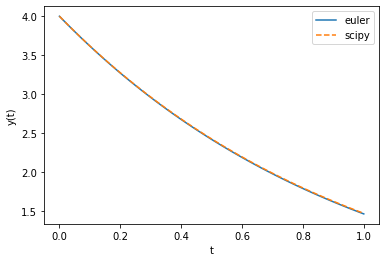

In [4]:
t = np.linspace(0,1,100)
f = lambda y, t : -y
y0 = 4
y_euler = ode_euler(f, y0, t)
y_scipy = odeint(f, y0, t)

plt.plot(t, y_euler, label='euler')
plt.plot(t, y_scipy, '--', label='scipy')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')

## Aufgabe 4: Leaky integrator ohne Input-Strom
Wir suchen nach Lösungen für das LI-Neuron für den Fall ohne Input-Strom $I_{in}=0$. Wir setzen $V(0) = -100 mV$ und berechnen $V(t)$ für $0<t<0.1 sec$.

- Untersuchen Sie zunächst die DGL auf Ordnung, Linearität, homogen/inhomogen, autonom/nicht-autonom, abhängige und unabhängige Variable.

- Lösen Sie die DGL mit dem ***Euler-Verfahren*** und `odeint`.  Vergleichen Sie die numerische Lösung mit der analytischen Lösung. 

- Verwenden Sie beim Euler-Verfahren unterschiedliche Schrittweiten $\Delta t$. Wie verhält sie der numerische Fehler für verschiedene Schrittweiten $\Delta t = 0.1, 0.01, 0.001, 0.0001$?

- Wie erklären Sie den Fehler des Euler-Verfahrens?

Wir verwenden im Weiteren `odeint`.

- Ändern Sie das Ruhepotential ($v_{rest}$). Was beobachten Sie?

- Ändern sie die spezifische Leitfähigkeit der Membran ($g_l$). Was beobachten Sie?

- Ändern sie die spezifische Kapazität der Membran ($c_m$). Was beobachten Sie?

### Analytische Lösung:
Die folgende Python-Funktion berechnet die exakte Lösung $V(t)$ für einen konstanten Input-Strom im LI-Neuron. Wir vergleichen die exakte Lösung mit unserer numerischen Lösung.

In [5]:
def leaky_int_exact_solution(v_0, t):
    """
    compute exact solution of leaky integrator if electrode current is constant
    
    params: 
    v_0: initial condition
    t: array of time points (numpy array)
    i_in:electrode current
    
    other parameters used in this function
    g_l: memabrane conductance
    c_m: membrane conductance
    v_rest: resting potential
    
    
    return: solution array v(t)
    """

    return (v_0 - v_rest - i_in(t) / g_l) * np.exp(-t/(c_m / g_l)) + v_rest + i_in(t) / g_l

### Dynamische Form:
Zeitableitung von V
$$
\frac{dV}{dt}=f_{LeakyIntegrator}(V,t)
$$

In [6]:
################
# Aufgabe
################

def f_leaky_integrator(v,t):
    """
    input params:
    v: membrane potential at time t_n
    t: time points
    
    other params used in this function
    i_in: electrode current at time t_n
    g_l: leak conductance
    c_m: membran capacitance
    v_rest: resting potential
    
    returns: dV/dt at time t_n, where dV/dt=f(V_n,t_n)
    """
    return """TODO"""

In [7]:
################
# Lösung
################

def f_leaky_integrator(v,t):
    """
    input params:
    v: membrane potential at time t_n
    t: time points
    
    other params used in this function
    i_in: electrode current at time t_n
    g_l: leak conductance
    c_m: membran capacitance
    v_rest: resting potential
    
    returns: dV/dt at time t_n, where dV/dt=f(V_n,t_n)
    """
    return -g_l / c_m * ( v - v_rest) + i_in(t) / c_m

Parameters used in simulation:
v_rest: -0.07
c_m: 0.010000592999999999
g_l: 0.3


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

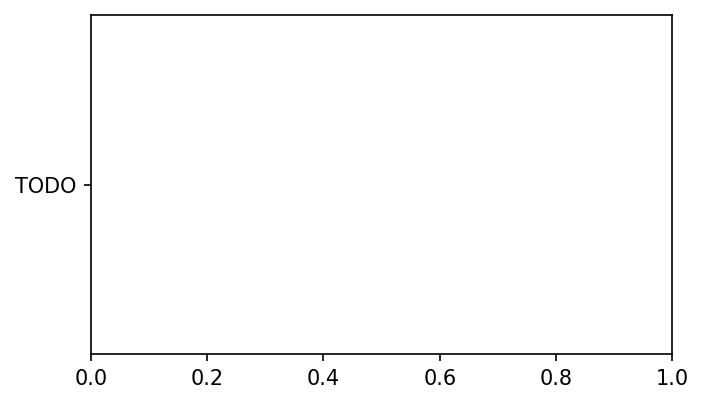

In [8]:
################
# Aufgabe
################
"""
implementation of Euler-integration
time-step h is difference between two consecutive points; h_n = t[n+1] - t[n]
"""
N = 10 # number of time steps
t_0, t_max = 0., 0.1 # where to solve t_0<t<t_max, [seconds]
t = np.linspace(t_0, t_max, N+1)  # array of all time steps for iterative solution

# no input current
i_in = lambda t : 0

# initial condition
v_0 = -0.100 

##############
# set parameters to standard values
set_parameters()
# then change parameters here!
v_rest= -0.07 
c_m= 0.010000592999999999
g_l= 0.3
tau_m = c_m / g_l
############


print("Parameters used in simulation:")
print('v_rest:', v_rest)
print('c_m:', c_m)
print('g_l:', g_l)

# solve 
v_euler = """TODO"""
v_scipy = """TODO"""
v_exact = """TODO"""

# plot the solutions
fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)
ax.plot(t, v_euler, 'k-', label='euler-method')
ax.plot(t, v_scipy, 'r-.', label='scipy odeint')
ax.plot(t, v_exact, 'y--', label='exact')
ax.set_xlabel('time [s]')
ax.set_ylabel('membrane voltage [V]')
ax.legend()
plt.show()



Parameters used in simulation:
v_rest: -0.07
c_m: 0.030000593
g_l: 0.3


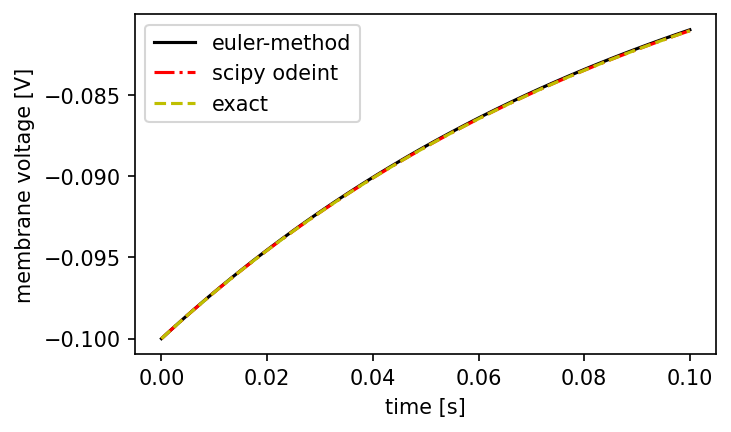

In [9]:
################
# Lösung 
################
"""
implementation of Euler-integration
time-step h is difference between two consecutive points; h_n = t[n+1] - t[n]
"""
N = 100 # number of time steps
t_0, t_max = 0., 0.1 # where to solve t_0<t<t_max, [seconds]
t = np.linspace(t_0, t_max, N+1)  # array of all time steps for iterative solution

# no input current
i_in = lambda t : 0

# initial condition
v_0 = -0.100 

##############
# set parameters to standard values
set_parameters()
# then change parameters here!
v_rest= -0.07 
c_m= 0.030000592999999999
g_l= 0.3
############


print("Parameters used in simulation:")
print('v_rest:', v_rest)
print('c_m:', c_m)
print('g_l:', g_l)

# solve 
v_euler = ode_euler(f_leaky_integrator, v_0, t)
v_scipy = odeint(f_leaky_integrator, v_0, t)
v_exact = leaky_int_exact_solution(v_0, t)

# plot the solutions
fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)
ax.plot(t, v_euler, 'k-', label='euler-method')
ax.plot(t, v_scipy, 'r-.', label='scipy odeint')
ax.plot(t, v_exact, 'y--', label='exact')
ax.set_xlabel('time [s]')
ax.set_ylabel('membrane voltage [V]')
ax.legend()
plt.show()

## Lösung 4
- lineare gewöhnliche DGL erster Ordung, V abhängige und t unabhängige Variable, nicht-homogen, autonom da $i_{in}=0$.
- Für große Schritte $\Delta t$ erhöht sich der Fehler. Die Größe und Richtung des Fehlers hängt von der Krümmung der gesuchten Funktion ab.
- $v_{rest}$ bestimmt den Grenzwert für große $t$.
- Leitfähigkeit und Kapazität verändern die Zeitkonstante. 

## Zusatz zur numerischen Stabilität des Euler-Verfahrens
Wir lösen die DGL (Leaky Integrator) für $t_{max} = 1sec$ mit dem Euler-Verfahren. Wir starten bei N=100 Zeitschritten und verringern die Anzahl der Zeitschritte bei konstantem $t_{max} = 1sec$. 

Wir untersuchen nun:  
- Bei welchem N beginnt die Lösung zu oszillieren? 
- Ab wann divergiert die Lösung?
- Wie könnte man überprüfen, ob die numerische Lösung stabil ist?

***Antworten:***

N=16 bzw. N=15. Leichte Oszillationen werden sichtbar ab ca. N=30.

Um zu überprüfen ob die Lösung stabil ist, wählen wir zunächst N. Verändert sich die Lösung bei kleinen Änderungen von N nicht, so ist das ein gutes Indiz, dass wir eine stabile Lösung gefunden haben.

Erklärung: Explizite Lösungsverfahren können zu instabilen Lösungen führen.

## Aufgabe 5: Leaky Integrator mit konstantem Elektrodenstrom

Modellieren Sie nun eine konstanten Elektrodenstrom. 

- Wie hoch muss die Stromstärke gewählt werden, um die Membranspannung dauerhaft sehr nahe bei $-0.100 V$ zu halten? Schätzen Sie die Stromstärke pro Fläche, sowie die Gesamtstromstärkte ungefähr ab.

- Was bedeutet ein positiver bzw. negativer Strom?

Modellieren Sie als nächstes einen oszillierendem Elektrodenstrom mit Frequenz $f$
$$i(t)=i_0 sin(\omega t),~~~ \omega=2 \pi f $$. 

- Wie muss die Stromstärke $i_0$ und Frequenz $f$ gewählt werden, damit die Spannung mit einer Amplitude von ungefähr 20mV und 10Hz oszilliert?

- Bei gleicher Stromstärke, erhöhen Sie dann die Frequenz des Elektrodenstroms. Wie verändert sich der Verlauf der Membranspannung.

In [10]:
################
# Aufgabe
################

N = 1000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N+1)

# initial condition
v_0 = -0.100 

# set parameters to standard values
set_parameters()

# input current per unit area/surface
freq = """TODO""" # cycles per second
omega = 2. * np.pi * freq 
current_ampl = """TODO""" # current [A]
const_current = """TODO""" # [A/m^2]
i_in = lambda t: np.sin(omega * t) * current_ampl / a + const_current # per unit area

# solve 
v_scipy = odeint(f_leaky_integrator, v_0, t)

# plot the solutions
fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)
ax.plot(t, v_scipy, 'k-', label='scipy odeint')
ax.set_xlabel('time [s]')
ax.set_ylabel('membrane voltage [V]')
ax.legend()
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

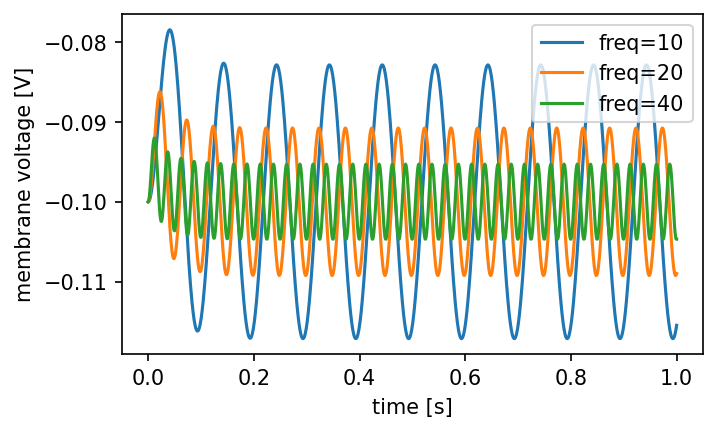

In [22]:
################
# Lösung
################

N = 1000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N+1)

# initial condition
v_0 = -0.100 

# set parameters to standard values
set_parameters()

# input current per unit area/surface
freq = 10 # cycles per second
omega = 2. * np.pi * freq 
current_ampl = 1.5e-11 # current [A]
const_current = -0.009 # [A/m^2]
i_in = lambda t: np.sin(omega * t) * current_ampl / a + const_current # per unit area

# solve 
v_scipy = odeint(f_leaky_integrator, v_0, t)

# plot the solutions
fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)

for freq in [10, 20, 40]:
    i_in = lambda t: np.sin(omega * t) * current_ampl / a + const_current # per unit area
    omega = 2. * np.pi * freq 
    v_scipy = odeint(f_leaky_integrator, v_0, t)
    ax.plot(t, v_scipy, label='freq='+str(freq))




ax.set_xlabel('time [s]')
ax.set_ylabel('membrane voltage [V]')
ax.legend()
plt.show()

## Lösung 5

- Konstanter Elektrodenstrom $i_{in} = -0.009 A/m^2$  hält $V_m$ bei -100 mV. Für die gegebene Zelle erhält man eine Stromstärke von -1.1309733552923255e-11 Ampere. Vgl. USB port am Computer 0.5A bei 5V.
 
- Die Stromrichtung entspricht der Bewegungsrichtung der positiven Ladungen. Ist die Stromstärke positiv, bewegen sich positive Ladungen in die Zelle hinein. Ist die Stromstärke negativ, bewegen sich positive Ladungen aus der Zelle hinaus.

- Alternierender Elektrodenstrom: 10 Hz, 1.9e-11 Ampere 
    
- Die Amplitude der Membranspannung verringert sich bei steigender Frequenz. Die Zellmembran fungiert als Low-Pass-Filter.




## Aufgabe 6: Low Pass Filter

Berechnen Sie für periodische Inputs $i_{in}$ die Amplitude der Schwingung des Membranpotentials. Messen Sie die Amplitude für verschiede Frequenzen 1Hz<f<1000Hz und visualisieren Sie den Zusammenhang.

Welchen Einfluss hat eine Veränderung von Leitfähigkeit und Membrankapazität auf die Filtereigenschaften? 

Wie erklären Sie das Ergebnis der Biophysikalisch? Tip: Siehe Aufgabe 4


In [12]:
def get_amplitude(v, v_rest):
    """
    very rough estimate of amplitude 
    get max and min of voltage trace and divide difference by two
    only works if temporal behaviour of voltage trace does not change!
    """
    v = v[len(v)//5:]  # ignore initial time steps
    max_v = np.max(v)
    min_v = np.min(v)
    ampl = (max_v - min_v) / 2.
    return ampl

TypeError: cannot perform reduce with flexible type

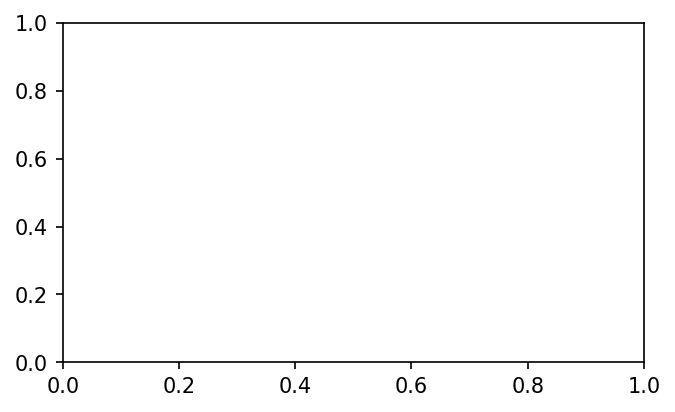

In [13]:
################
# Aufgabe
################

fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)

N = 1000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N)

# initial condition
v_0 = -0.070 

##############
# set parameters to standard values
set_parameters()
# then change parameters here!
v_rest= -0.07 
c_m= 0.010000592999999999
g_l= 0.3
tau_m = c_m / g_l
############

# different frequencies of input current
sin_freqs = [1 + 10 * i for i in range(0, 30)]
i_el=1.9e-11
v_amps=[]

for freq in sin_freqs:  # cycles per second

    """TODO"""
    """TODO"""
    """TODO"""
    """TODO"""
    """TODO"""
    """TODO"""
    v = """TODO"""

    amp = get_amplitude(v, v_rest)
    v_amps.append(amp)
    

ax.plot(sin_freqs, v_amps, '-', marker='x', label=r'$\tau_m=${tau:.4f}s'.format(tau=tau_m))
ax.set_xlabel('input frequency [Hz]')
ax.set_ylabel('membrane voltage\n amplitude [V]')
ax.legend(loc='upper right')
plt.show()

print(g_l, c_m)
set_parameters()
g_l, c_m

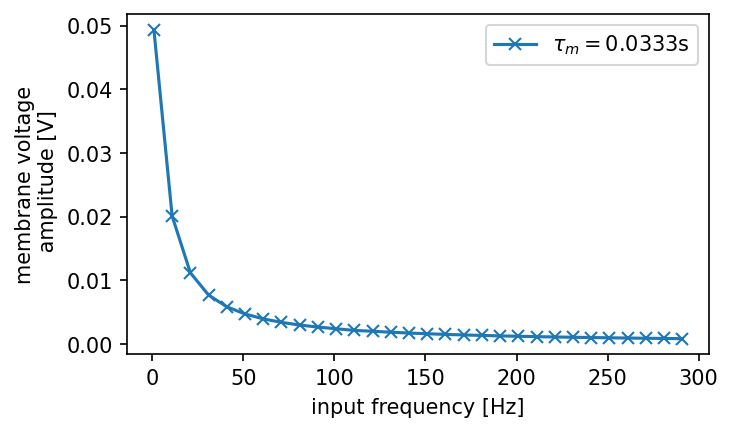

0.3 0.010000592999999999


(0.3, 0.010000592999999999)

In [23]:
################
# Lösung
################

fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)

N = 1000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N)

# initial condition
v_0 = -0.070 

##############
# set parameters to standard values
set_parameters()
# then change parameters here!
v_rest= -0.07 
c_m= 0.010000592999999999
g_l= 0.3
tau_m = c_m / g_l
############

# different frequencies of input current
sin_freqs = [1 + 10 * i for i in range(0, 30)]
current_ampl=1.9e-11
v_amps=[]

for freq in sin_freqs:  # cycles per second

    omega = 2. * np.pi * freq
    i_in = lambda t: np.sin(omega * t) * current_ampl / a # per unit area

    # solve 
    v = odeint(f_leaky_integrator, v_0, t)

    amp = get_amplitude(v, v_rest)
    v_amps.append(amp)
    

ax.plot(sin_freqs, v_amps, '-', marker='x', label=r'$\tau_m=${tau:.4f}s'.format(tau=tau_m))
ax.set_xlabel('input frequency [Hz]')
ax.set_ylabel('membrane voltage\n amplitude [V]')
ax.legend(loc='upper right')
plt.show()

print(g_l, c_m)
set_parameters()
g_l, c_m

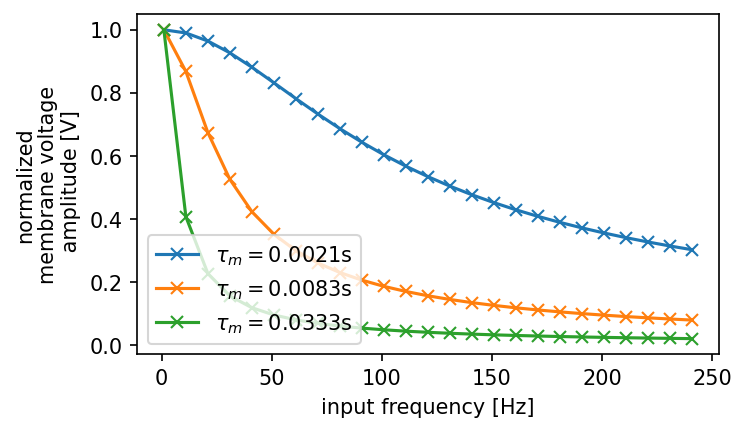

0.3 0.01


(0.3, 0.010000592999999999)

In [27]:
################
# Lösung
################

fig = plt.figure(dpi=150, figsize=(5,3))
ax = fig.add_subplot(111)

N = 10000 # number of time steps
t_0, t_max = 0., 1. # [seconds]
t = np.linspace(t_0, t_max, N)

# initial condition
v_0 = -0.070 

# different frequencies of input current
sin_freqs = [1 + 10 * i for i in range(0, 25)]

for current_ampl, c_m, g_l in ((1.9e-11, 0.01, 4.8), (1.9e-11, 0.01, 1.2), (1.9e-11, 0.01, 0.3), ):
    tau_m = c_m/g_l
    v_amps = []
    for freq in sin_freqs:  # cycles per second

        omega = 2. * np.pi * freq
        i_in = lambda t: np.sin(omega * t) * current_ampl / a # per unit area


        # solve 
        v = odeint(f_leaky_integrator, v_0, t)

        amp = get_amplitude(v, v_rest)
        v_amps.append(amp)
    
    v_amps = np.array(v_amps)/v_amps[0]
    ax.plot(sin_freqs, v_amps, '-', marker='x', label=r'$\tau_m=${tau:.4f}s'.format(tau=tau_m))
    #ax.loglog(sin_freqs, v_amps, '-', marker='x', label=r'$\tau_m=${tau:.4f}s'.format(tau=tau_m))
ax.set_xlabel('input frequency [Hz]')
ax.set_ylabel('normalized\nmembrane voltage\n amplitude [V]')
ax.legend(loc='lower left')
plt.show()

print(g_l, c_m)
set_parameters()
g_l, c_m

## Lösung 6
Die Zeitkonstante $\tau_m=c_m/g_l$ bestimmt die Filtereigenschaften.

Beispiel: Erhöhen wir $c_m$ so erhöht sich die Zeitkonstante. Die Membran antwortet langsamer auf Änderungen des Elektrodenstroms und filtert diesen stärker. Die Amplitude sinkt. Durch verändern der Zeitkonstante verändert sich die "cutoff-frequency" (https://en.wikipedia.org/wiki/Low-pass_filter).

In [14]:
# ursprünglicher Wert
c_m, g_l

(0.010000592999999999, 0.3)


# Hausaufgaben:
## Aufgabe 7: 
Lösen sie die DGLn A)-D) aus Aufgabe 1 numerisch, und vergleichen Sie die numerische Lösung mit der exakten Lösung.

[0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]


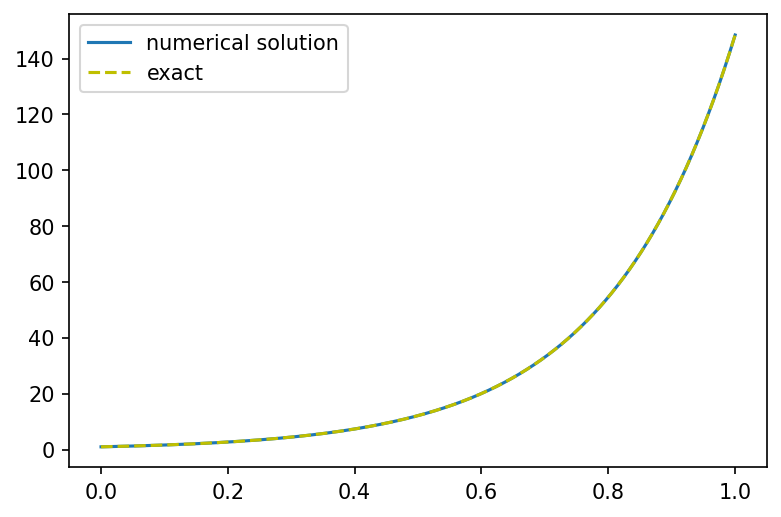

In [64]:
################
# Lösung
################

# time points
N = 10000
t_min = 0
t_max = 1
t = np.linspace(t_min, t_max, N+1)
print(t)

# analytical solution 
y_exact = np.exp(5*t)

# right side of ODE dynamical form
def f(x,t):
    return 5*x

# solve numerically 
y = odeint(f, 1, t)

# show result
fig = plt.figure(dpi=150)
plt.plot(t,y, label='numerical solution')
plt.plot(t,y_exact, 'y--',label='exact')
plt.legend()
plt.show()